# TASK 2.0 - CLUSTERING PREPARATION

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

#### Loading the dataset

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [5]:
df = pd.read_csv(r"seismic_new.csv", skipinitialspace=True)

In [6]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class,log_genergy,log_gpuls,log_gdenergy,log_gdpuls,log_energy
0,0.0,0.0,0,15180,48,-72,-72,0.0,0,0,0,0,0,0,0,9.627734,3.871201,3.218876,3.218876,0.000000
1,0.0,0.0,0,14720,33,-70,-79,0.0,1,0,1,0,0,2000,0,9.596962,3.496508,3.295837,2.890372,7.601402
2,0.0,0.0,0,8050,30,-81,-78,0.0,0,0,0,0,0,0,0,8.993427,3.401197,2.772589,2.944439,0.000000
3,0.0,0.0,0,28820,171,-23,40,0.0,1,0,1,0,0,3000,0,10.268825,5.141664,4.304065,4.919981,8.006701
4,0.0,0.0,0,12640,57,-63,-52,0.0,0,0,0,0,0,0,0,9.444622,4.043051,3.526361,3.806662,0.000000


In [7]:
df.shape

(2578, 20)

In [8]:
sns.set_theme(style="darkgrid")

## RobustScaler

### GEnergy

In [9]:
from sklearn.preprocessing import RobustScaler

In [10]:
col_genergy = [col for col in df.columns if col == 'log_genergy']
RS_genergy = df[col_genergy].values
RS_genergy

scaler_genergy = RobustScaler()
RS_genergy_scal = scaler_genergy.fit_transform(RS_genergy)
df['genergy_S'] = RS_genergy_scal

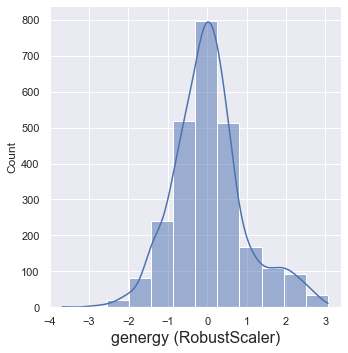

In [11]:
sns.displot(data=df, x="genergy_S", kde=True, bins=12)
plt.xlabel('genergy (RobustScaler)', fontsize=16)
plt.ylabel("Count")
plt.show()

### GPuls

In [12]:
col_gpuls = [col for col in df.columns if col == 'log_gpuls']
RS_gpuls = df[col_gpuls].values
RS_gpuls

scaler_gpuls = RobustScaler()
RS_gpuls_scal = scaler_gpuls.fit_transform(RS_gpuls)
df['gpuls_S'] = RS_gpuls_scal

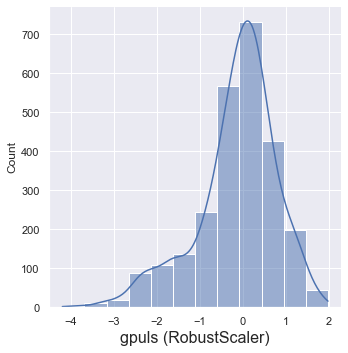

In [13]:
sns.displot(data=df, x="gpuls_S", kde=True, bins=12)
plt.xlabel('gpuls (RobustScaler)', fontsize=16)
plt.ylabel("Count")
plt.show()

### Energy

In [14]:
col_energy = [col for col in df.columns if col == 'log_energy']
RS_energy = df[col_energy].values
RS_energy

scaler_energy = RobustScaler()
RS_energy_scal = scaler_energy.fit_transform(RS_energy)
df['energy_S'] = RS_energy_scal

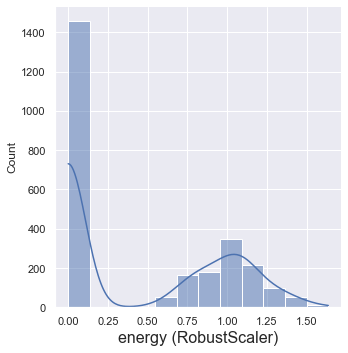

In [15]:
sns.displot(data=df, x="energy_S", kde=True, bins=12)
plt.xlabel('energy (RobustScaler)', fontsize=16)
plt.ylabel("Count")
plt.show()

### GdEnergy

In [16]:
col_gdenergy = [col for col in df.columns if col == 'log_gdenergy']
RS_gdenergy = df[col_gdenergy].values
RS_gdenergy

scaler_gdenergy = RobustScaler()
RS_gdenergy_scal = scaler_gdenergy.fit_transform(RS_gdenergy)
df['gdenergy_S'] = RS_gdenergy_scal

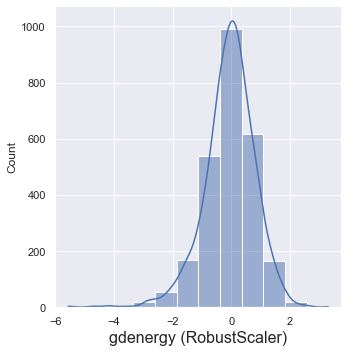

In [17]:
sns.displot(data=df, x="gdenergy_S", kde=True, bins=12)
plt.xlabel('gdenergy (RobustScaler)', fontsize=16)
plt.ylabel("Count")
plt.show()

### GdPuls

In [18]:
col_gdpuls = [col for col in df.columns if col == 'log_gdpuls']
RS_gdpuls = df[col_gdpuls].values
RS_gdpuls

scaler_gdpuls = RobustScaler()
RS_gdpuls_scal = scaler_gdpuls.fit_transform(RS_gdpuls)
df['gdpuls_S'] = RS_gdpuls_scal

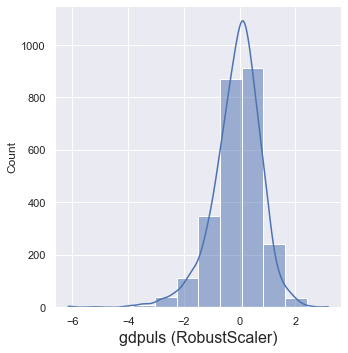

In [19]:
sns.displot(data=df, x="gdpuls_S", kde=True, bins=12)
plt.xlabel('gdpuls (RobustScaler)', fontsize=16)
plt.ylabel("Count")
plt.show()

In [20]:
df.describe()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,...,log_genergy,log_gpuls,log_gdenergy,log_gdpuls,log_energy,genergy_S,gpuls_S,energy_S,gdenergy_S,gdpuls_S
count,2578.000000,2578.000000,2578.000000,2.578000e+03,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,...,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000
mean,0.349884,0.407292,0.644686,9.034118e+04,539.366563,12.392940,4.521334,0.105508,0.861521,0.394492,...,10.223021,5.764784,4.469874,4.438448,3.489746,0.050829,-0.139011,0.442191,-0.050541,-0.098745
std,0.477026,0.527969,0.478701,2.294339e+05,562.945864,80.352799,63.211324,0.343068,1.365573,0.784454,...,1.391900,1.171785,0.708911,0.646341,4.118438,0.923771,0.935777,0.521853,0.874195,0.881399
min,0.000000,0.000000,0.000000,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,...,4.605170,0.693147,0.000000,0.000000,0.000000,-3.677606,-4.189175,0.000000,-5.562574,-6.151341
25%,0.000000,0.000000,0.000000,1.169250e+04,191.250000,-37.000000,-36.000000,0.000000,0.000000,0.000000,...,9.366703,5.253579,4.094345,4.110874,0.000000,-0.517489,-0.547254,0.000000,-0.513626,-0.545450
50%,0.000000,0.000000,1.000000,2.550000e+04,379.500000,-6.000000,-6.000000,0.000000,0.000000,0.000000,...,10.146434,5.938854,4.510860,4.510860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,5.275750e+04,669.000000,38.000000,30.000000,0.000000,1.000000,1.000000,...,10.873461,6.505784,4.905275,4.844187,7.891946,0.482511,0.452746,1.000000,0.486374,0.454550
max,1.000000,2.000000,1.000000,2.595650e+06,4518.000000,1245.000000,838.000000,2.000000,9.000000,8.000000,...,14.769348,8.415825,7.201916,6.840547,12.904210,3.068119,1.978087,1.635111,3.318481,3.176933


In [22]:
df.to_csv("seismic_clust.csv", index=False)